In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.pipeline import make_pipeline

# Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Preprocessing Techniques

In [3]:
preprocessings = {
    'No Data Processing': None,
    'Using Normalization': Normalizer(),
    'Using Transform': StandardScaler(),
    'Using PCA': PCA(n_components=2),
    'Using T+N': make_pipeline(StandardScaler(), Normalizer()),
    'Using T+N+PCA': make_pipeline(StandardScaler(), Normalizer(), PCA(n_components=2))
}

# Clustering algorithms used

In [4]:
algorithms = {
    'K-means': KMeans,
    'Hierarchical': AgglomerativeClustering,
    'Mean Shift': MeanShift
}

In [5]:
cluster_nums = [3, 4, 5]

results = []

# Clustering with different combinations

In [6]:
for algo_name, Algorithm in algorithms.items():
    for prep_name, prep in preprocessings.items():
        for c in cluster_nums:
            try:
                # Skip MeanShift as it determines clusters automatically
                if algo_name == 'Mean Shift' and c != 3:
                    continue

                # Prepare data
                if prep is None:
                    X_processed = X
                else:
                    X_processed = prep.fit_transform(X)

                # Handle MeanShift separately (doesn't take n_clusters parameter)
                if algo_name == 'Mean Shift':
                    clusterer = Algorithm()
                else:
                    clusterer = Algorithm(n_clusters=c)

                # Fit and predict
                labels = clusterer.fit_predict(X_processed)

                # Calculate metrics (only if we have more than 1 cluster)
                if len(np.unique(labels)) > 1:
                    silhouette = silhouette_score(X_processed, labels)
                    calinski = calinski_harabasz_score(X_processed, labels)
                    davies = davies_bouldin_score(X_processed, labels)
                else:
                    silhouette = calinski = davies = np.nan

                # Store results
                results.append({
                    'Algorithm': algo_name,
                    'Preprocessing': prep_name,
                    'Clusters': c,
                    'Silhouette': silhouette,
                    'Calinski-Harabasz': calinski,
                    'Davies-Bouldins': davies
                })

            except Exception as e:
                print(f"Error with {algo_name}, {prep_name}, c={c}: {str(e)}")
                results.append({
                    'Algorithm': algo_name,
                    'Preprocessing': prep_name,
                    'Clusters': c,
                    'Silhouette': np.nan,
                    'Calinski-Harabasz': np.nan,
                    'Davies-Bouldins': np.nan
                })

# Converting results to dataframe

In [7]:
results_df = pd.DataFrame(results)

# Pivot tables for each metric
silhouette_table = results_df.pivot_table(index=['Algorithm', 'Preprocessing'],
                                         columns='Clusters',
                                         values='Silhouette')

calinski_table = results_df.pivot_table(index=['Algorithm', 'Preprocessing'],
                                       columns='Clusters',
                                       values='Calinski-Harabasz')

davies_table = results_df.pivot_table(index=['Algorithm', 'Preprocessing'],
                                     columns='Clusters',
                                     values='Davies-Bouldins')


# Displaying tables

In [9]:
print("Silhouette Scores:")
display(silhouette_table)


Silhouette Scores:


Clusters                                 3         4         5
Algorithm    Preprocessing                                    
Hierarchical No Data Processing   0.554324  0.488967  0.484383
             Using Normalization  0.556232  0.479108  0.465668
             Using PCA            0.598475  0.540977  0.548784
             Using T+N            0.497641  0.476814  0.436102
             Using T+N+PCA        0.646757  0.614649  0.557788
             Using Transform      0.446689  0.400636  0.330587
K-means      No Data Processing   0.552819  0.497455  0.491240
             Using Normalization  0.576326  0.391497  0.501004
             Using PCA            0.597676  0.559111  0.453333
             Using T+N            0.554713  0.478226  0.467076
             Using T+N+PCA        0.649255  0.614649  0.557061
             Using Transform      0.456535  0.383499  0.354798
Mean Shift   No Data Processing   0.685788       NaN       NaN
             Using Normalization  0.819244       NaN       NaN
             Using PCA            0.710311       NaN       NaN
             Using T+N            0.546956       NaN       NaN
             Using T+N+PCA        0.649255       NaN       NaN
             Using Transform      0.581750       NaN       NaN

In [10]:
print("\nCalinski-Harabasz Scores:")
display(calinski_table)


Calinski-Harabasz Scores:


Clusters                                    3            4           5
Algorithm    Preprocessing                                            
Hierarchical No Data Processing    558.058041   515.078906  488.484904
             Using Normalization  1386.775482  1063.773023  917.203228
             Using PCA             688.617548   673.946264  665.883112
             Using T+N             242.266612   245.717511  218.639014
             Using T+N+PCA         449.143635   522.114519  562.466265
             Using Transform       222.719164   201.251454  192.681283
K-means      No Data Processing    561.627757   530.487142  495.369906
             Using Normalization  1446.997540  1093.362172  983.188397
             Using PCA             693.708433   718.374055  652.713083
             Using T+N             288.675592   252.549060  220.724478
             Using T+N+PCA         481.721469   522.114519  589.524545
             Using Transform       239.484532   207.255529  200.458044
Mean Shift   No Data Processing    509.703427          NaN         NaN
             Using Normalization  1633.998496          NaN         NaN
             Using PCA             565.734052          NaN         NaN
             Using T+N             215.353961          NaN         NaN
             Using T+N+PCA         481.721469          NaN         NaN
             Using Transform       251.349339          NaN         NaN

In [11]:
print("\nDavies-Bouldins Scores:")
display(davies_table)



Davies-Bouldins Scores:


Clusters                                 3         4         5
Algorithm    Preprocessing                                    
Hierarchical No Data Processing   0.656256  0.795264  0.820417
             Using Normalization  0.693809  0.868267  0.994574
             Using PCA            0.560496  0.654624  0.652573
             Using T+N            0.828864  0.889194  0.880079
             Using T+N+PCA        0.463699  0.520675  0.541163
             Using Transform      0.803467  0.978821  0.974249
K-means      No Data Processing   0.661972  0.775701  0.815989
             Using Normalization  0.644248  1.017644  0.861849
             Using PCA            0.564816  0.604242  0.725398
             Using T+N            0.736454  0.904510  0.915217
             Using T+N+PCA        0.515777  0.520675  0.575881
             Using Transform      0.827512  0.880266  0.921020
Mean Shift   No Data Processing   0.388552       NaN       NaN
             Using Normalization  0.240689       NaN       NaN
             Using PCA            0.355059       NaN       NaN
             Using T+N            0.689363       NaN       NaN
             Using T+N+PCA        0.515777       NaN       NaN
             Using Transform      0.593313       NaN       NaN

In [12]:
# Visualization
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Plotting Silhouette Scores

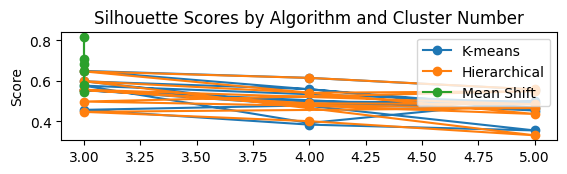

In [13]:
plt.subplot(3, 1, 1)
for algo in algorithms.keys():
    subset = results_df[results_df['Algorithm'] == algo]
    plt.plot(subset['Clusters'], subset['Silhouette'], 'o-', label=algo)
plt.title('Silhouette Scores by Algorithm and Cluster Number')
plt.ylabel('Score')
plt.legend()

# Plotting Calinski-Harabasz Scores

Text(0, 0.5, 'Score')

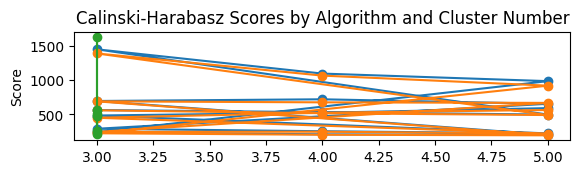

In [14]:
plt.subplot(3, 1, 2)
for algo in algorithms.keys():
    subset = results_df[results_df['Algorithm'] == algo]
    plt.plot(subset['Clusters'], subset['Calinski-Harabasz'], 'o-', label=algo)
plt.title('Calinski-Harabasz Scores by Algorithm and Cluster Number')
plt.ylabel('Score')


# Plotting Davies-Bouldins Scores

Text(0.5, 0, 'Number of Clusters')

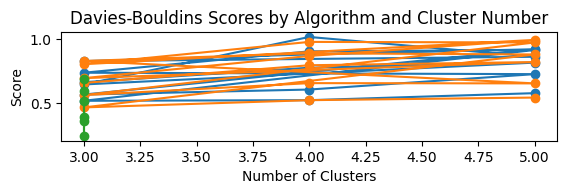

In [15]:
plt.subplot(3, 1, 3)
for algo in algorithms.keys():
    subset = results_df[results_df['Algorithm'] == algo]
    plt.plot(subset['Clusters'], subset['Davies-Bouldins'], 'o-', label=algo)
plt.title('Davies-Bouldins Scores by Algorithm and Cluster Number')
plt.ylabel('Score')
plt.xlabel('Number of Clusters')


In [16]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>